## Research Goal

The goal of this research is to explore and implement core algorithms for medical image preprocessing using real DICOM datasets.

The study focuses on:
- understanding pixel intensity representations (Hounsfield Units),
- analyzing DICOM metadata structure,
- applying visualization techniques commonly used in clinical imaging,
- building a foundation for further medical computer vision and ML experiments.


## Datasets

The following publicly available DICOM datasets are used in this research:

- **Chest CT DICOM dataset**  
  https://disk.yandex.ru/d/v6d_t2cozbpRMA

- **Knee CT DICOM dataset**  
  https://disk.yandex.ru/d/8STUZoPkSwUZiQ

Both datasets contain raw medical images in DICOM format along with full acquisition metadata.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Task 1: DICOM Volume Construction (Chest CT)

This task focuses on reconstructing a volumetric CT scan from individual DICOM slices.

### Algorithmic Steps
1. Load a series of DICOM slices from a directory  
2. Sort slices to preserve correct anatomical order  
3. Stack slices into a 3D NumPy volume  
4. Inspect voxel values represented in Hounsfield Units (HU)  
5. Visualize all slices of the reconstructed volume  

### Purpose
The purpose of this task is to understand how volumetric CT data is represented in practice and to analyze raw pixel intensity distributions used in medical imaging.


In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt

# import imageio                  # устаревшая v2 - не работает, но встречается в интернете повсеместно
import imageio.v2 as imageio      # указанная явно устаревшая v2 работает
import imageio.v3 as iio

In [ ]:
# Объединим в отсортированном порядке все файлы в папке

folder_path = '/content/DATA_DICOM_Chest'

files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.dcm')]
files.sort()

# Прочитаем изображения и создадим объем
ims = [imageio.imread(f) for f in files]
vol = np.stack(ims)

# получим результирующий массив
print(vol.shape)

(99, 512, 512)


In [ ]:
# Вывод формы массива
print("Форма массива:", vol.shape)

# Вывод первых нескольких срезов массива
print("Первые 3 среза массива:")
for i in range(min(3, vol.shape[0])):  # Выводим не более 3 срезов
    print(vol[i])

Форма массива: (99, 512, 512)
Первые 3 среза массива:
[[ -668  -780  -823 ...  -834  -800  -948]
 [ -715  -637  -654 ...  -902 -1007 -1018]
 [ -690  -548  -538 ...  -995  -978  -977]
 ...
 [ -926  -836  -838 ...  -868  -938  -899]
 [ -958  -886  -885 ...  -803  -950  -943]
 [ -856  -851  -924 ...  -836  -889  -877]]
[[-819 -763 -721 ... -943 -972 -922]
 [-537 -589 -689 ... -950 -946 -993]
 [-521 -506 -516 ... -834 -931 -981]
 ...
 [-871 -729 -852 ... -838 -918 -945]
 [-748 -873 -968 ... -926 -900 -969]
 [-920 -969 -869 ... -940 -909 -928]]
[[-815 -801 -774 ... -953 -947 -895]
 [-852 -881 -856 ... -954 -956 -965]
 [-761 -753 -773 ... -842 -871 -864]
 ...
 [-833 -861 -891 ... -914 -970 -905]
 [-914 -946 -887 ... -855 -897 -911]
 [-985 -904 -908 ... -924 -877 -897]]


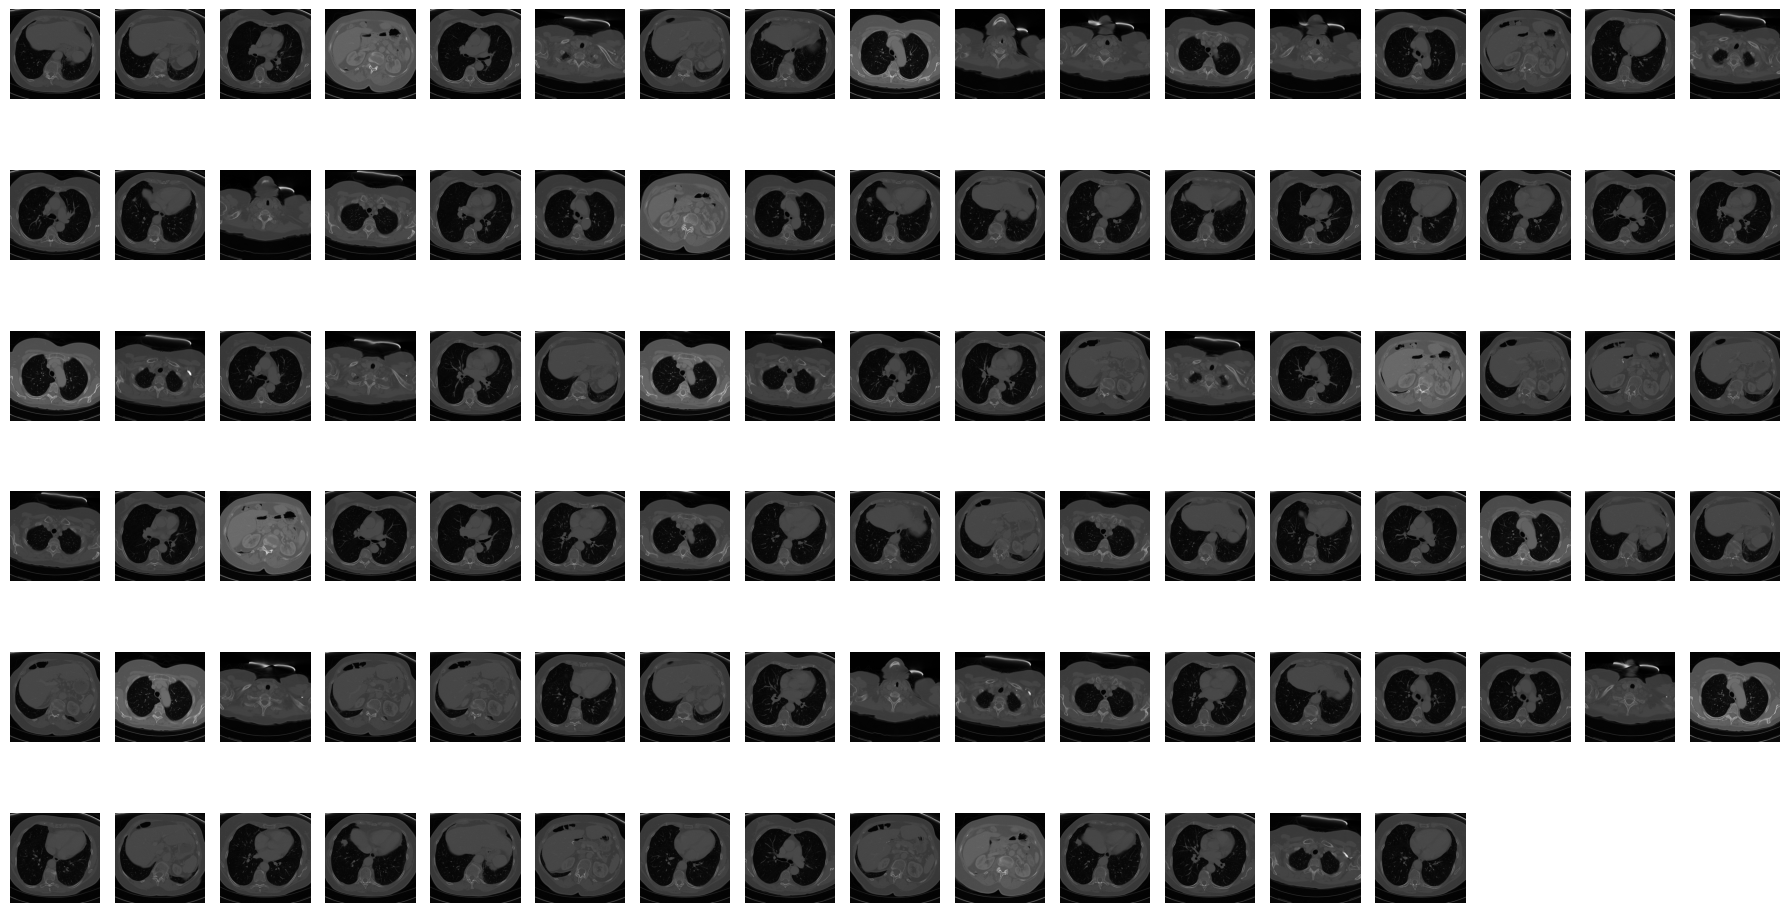

In [ ]:
# Предположим, что vol имеет форму (n, height, width)
n_slices = vol.shape[0]

rows = 6  # Количество строк
cols = n_slices // rows + (n_slices % rows > 0)  # Количество столбцов

# Создаем фигуру с подграфиками
fig, axes = plt.subplots(rows, cols, figsize=(18, 10))

# Визуализируем все срезы
for i in range(n_slices):
    ax = axes[i // cols, i % cols]  # Индексируем по двум осям
    ax.imshow(vol[i], cmap='gray')
    ax.axis('off')  # Отключаем оси

# Убираем пустые подграфики (если есть)
for j in range(n_slices, rows * cols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

## Task 2: DICOM Metadata Analysis and Image Conversion (Knee CT)

This task explores the structure of DICOM metadata and the conversion of medical images into standard visual formats.

### Algorithmic Steps
1. Load DICOM files using the `pydicom` library  
2. Extract and inspect metadata fields (scanner, modality, acquisition parameters, anonymization)  
3. Visualize several raw DICOM images  
4. Normalize pixel values to a standard range  
5. Convert selected DICOM slices into PNG format  

### Purpose
The purpose of this task is to study how clinical metadata is stored in DICOM files and to understand the differences between raw medical images and normalized visualization formats.


In [ ]:
!pip install pydicom
import os
import pydicom
import matplotlib.pyplot as plt
from PIL import Image

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 21.2 MB/s eta 0:00:00


In [ ]:
# Выведем метаданные

filename = os.path.join('/content/DATA_DICOM_knee/19696', files[0])
ds = pydicom.dcmread(filename)

# Изменение имени пациента в метаданных перед выводом
original_patient_name = ds.PatientName

# Вывод метаданных
print("\033[1mМетаданные папки:\033[0m")
print(ds)

# Восстановление исходного имени пациента
ds.PatientName = original_patient_name

Метаданные папки:
Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 196
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002,0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.7085.2626.214140401149739061368142942055
(0002,0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002,0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002,0013) Implementation Version Name         SH: 'dcm4che-1.4.35'
-------------------------------------------------
(0008,0005) Specific Character Set              CS: 'ISO_IR 100'
(0008,0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL', 'CT_SOM5 SPI']
(0008,0016) SOP Class UID                       UI: CT Image Storage
(0008,0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.7085.2626.214140401149739061368142942055
(0008,00

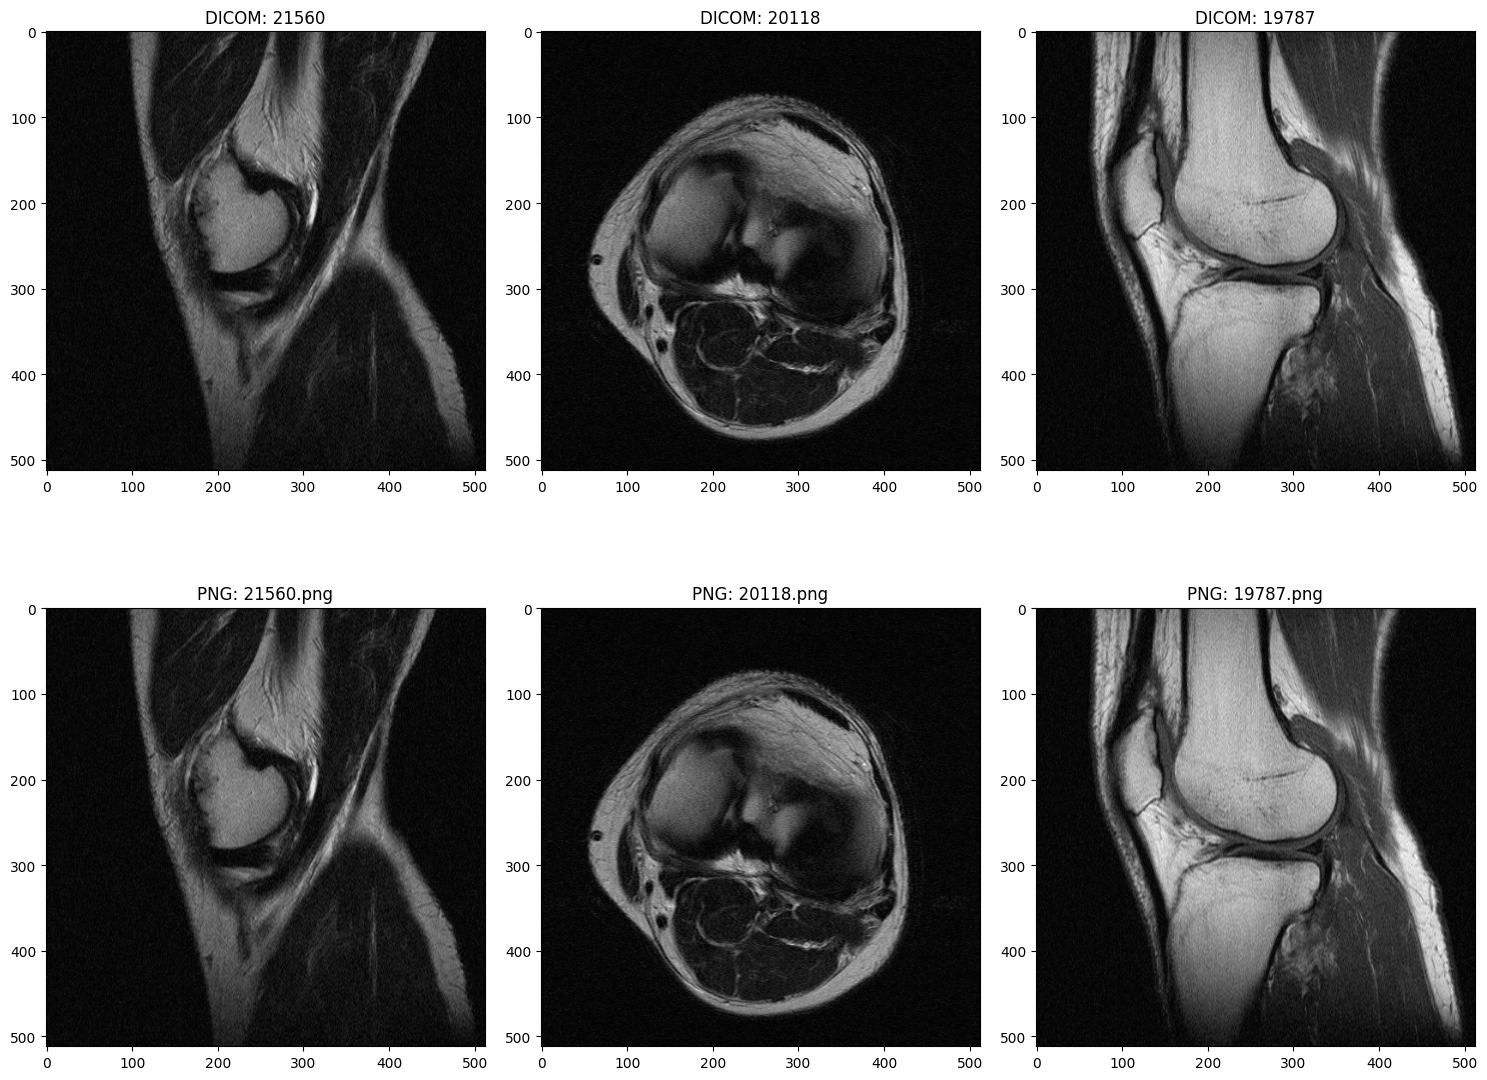

In [ ]:
# выведем изображения в .dcm и конвертируем их в png

import os
import random
import pydicom
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

dicom_dir = '/content/DATA_DICOM_knee'

# Получаем список всех файлов в директории
files = [f for f in os.listdir(dicom_dir) if os.path.isfile(os.path.join(dicom_dir, f))]

# Выбираем 3 случайных файла
random_files = random.sample(files, 3)

fig, axes = plt.subplots(2, 3, figsize=(15, 12))

# Отображаем каждое выбранное изображение в первой строке
for ax, file in zip(axes[0], random_files):
    dicom_file_path = os.path.join(dicom_dir, file)
    ds = pydicom.dcmread(dicom_file_path)
    ax.imshow(ds.pixel_array, cmap='gray')
    ax.set_title(f'DICOM: {file}')

# Конвертируем и отображаем изображения во второй строке
for ax, file in zip(axes[1], random_files):
    dicom_file_path = os.path.join(dicom_dir, file)
    ds = pydicom.dcmread(dicom_file_path)

    # Нормализация значений пикселей
    pixel_array = ds.pixel_array.astype(np.float32)  # Преобразуем в float для нормализации
    pixel_array -= pixel_array.min()  # Сдвигаем значения так, чтобы минимальное было 0
    pixel_array /= pixel_array.max()  # Нормализуем до диапазона [0, 1]
    pixel_array *= 255.0  # Увеличиваем до диапазона [0, 255]

    # Преобразуем в целочисленный тип uint8 для сохранения в PNG
    image = Image.fromarray(pixel_array.astype(np.uint8)).convert("L")  # "L" для градаций серого

    # Сохраняем изображение в формате PNG (опционально)
    png_file_path = os.path.join(dicom_dir, f"{os.path.splitext(file)[0]}.png")
    image.save(png_file_path)

    # Отображаем изображение в формате PNG
    ax.imshow(image, cmap='gray')
    ax.set_title(f'PNG: {os.path.basename(png_file_path)}')  # Устанавливаем заголовок с именем файла

# Показываем изображения
plt.tight_layout()
plt.show()

## Task 3: Window-Based Image Visualization (Chest CT)

This task demonstrates how windowing functions are used in clinical practice to highlight different anatomical structures.

### Algorithmic Steps
1. Load DICOM images and extract pixel arrays  
2. Apply a windowing function using configurable `window_center` and `window_width`  
3. Generate two visualization modes:
   - **Bone Window** — emphasizes high-density structures such as bones  
   - **Lung Window** — highlights lung tissue and air regions  
4. Normalize pixel values for correct display  
5. Export and visualize images in both DICOM and PNG formats  

### Purpose
The purpose of this task is to demonstrate how the same medical image can reveal different anatomical features depending on windowing parameters, which is a core concept in radiological image analysis.


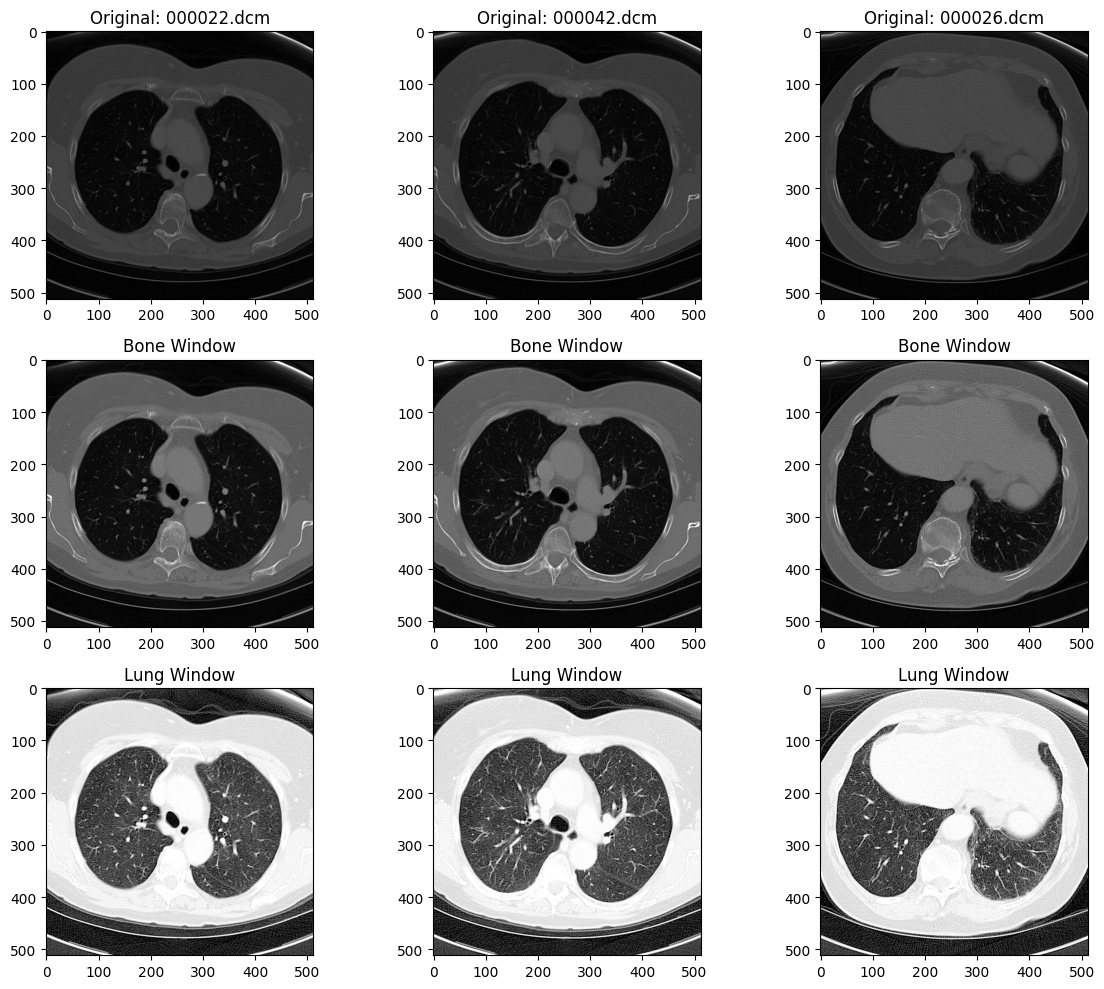

In [ ]:
import os
import random
import pydicom
import numpy as np
import matplotlib.pyplot as plt

def window_image(image, window_center, window_width):
    img_min = window_center - window_width // 2
    img_max = window_center + window_width // 2
    # Ограничиваем значения пикселей в пределах окна
    windowed_image = np.clip(image, img_min, img_max)
    return windowed_image

def apply_gamma_correction(image, gamma=1.0):
    """Применяет гамма-коррекцию к изображению."""
    image = image / 255.0  # Нормализуем значения
    image = np.power(image, gamma)  # Применяем гамма-коррекцию
    return (image * 255).astype(np.uint8)  # Возвращаем к диапазону [0, 255]

def create_windowed_images(file_path):
    """Создает изображения с применением оконных функций."""
    medical_image = pydicom.dcmread(file_path)
    image = medical_image.pixel_array.astype(np.float32)

    # Применяем оконные функции
    bone_image = window_image(image, window_center=500, window_width=4000)
    lung_image = window_image(image, window_center=600, window_width=1100)

    # Нормализация для корректного отображения
    bone_image = (bone_image - bone_image.min()) / (bone_image.max() - bone_image.min()) * 255.0
    lung_image = (lung_image - lung_image.min()) / (lung_image.max() - lung_image.min()) * 255.0

    # Применяем гамма-коррекцию для Lung Window
    lung_image = apply_gamma_correction(lung_image, gamma=0.5)  # Попробуйте разные значения гаммы

    return bone_image.astype(np.uint8), lung_image.astype(np.uint8)

# Путь к папке с DICOM файлами
folder_path = '/content/DATA_DICOM_Chest'

# Получаем список файлов DICOM
files = [f for f in os.listdir(folder_path) if f.endswith('.dcm')]

# Выбираем 3 случайных файла
random_files = random.sample(files, 3)

# Создаем фигуру для отображения изображений
fig, axes = plt.subplots(3, 3, figsize=(12, 10))

# Отображаем оригинальные изображения и их оконные версии
for i, file in enumerate(random_files):
    file_path = os.path.join(folder_path, file)

    # Сохраняем оригинальное изображение в формате PNG
    original_image = pydicom.dcmread(file_path).pixel_array.astype(np.float32)
    axes[0, i].imshow(original_image, cmap='gray')
    axes[0, i].set_title(f'Original: {file}')

    # Создаем оконные изображения
    bone_img, lung_img = create_windowed_images(file_path)

    # Отображаем изображения с оконными функциями
    axes[1, i].imshow(bone_img, cmap='gray')
    axes[1, i].set_title('Bone Window')

    axes[2, i].imshow(lung_img, cmap='gray')
    axes[2, i].set_title('Lung Window')

# Показываем изображения
plt.tight_layout()
plt.show()